+ Test if the data is normally distributed or not
+ how to handle?
+ p value < alpha
+ normalize data by transformation (log, explanation)

In [50]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -female pip install missingno
!{sys.executable} -female pip install statsmodels
!{sys.executable} -female pip install wordcloud


# work with df in tabular representation
from datetime import time
import pandas as pd
# round the df in the correlation matrix
import numpy as np
import os


# Modules for df visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from wordcloud import WordCloud

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

Unknown option: -f
usage: /Users/tnathu-ai/.conda/envs/Advanced_Programming_for_Data_Science/bin/python [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
Unknown option: -f
usage: /Users/tnathu-ai/.conda/envs/Advanced_Programming_for_Data_Science/bin/python [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
Unknown option: -f
usage: /Users/tnathu-ai/.conda/envs/Advanced_Programming_for_Data_Science/bin/python [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.


In [51]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.22.3
Pandas version:  1.4.3
Python 3.10.4


In [52]:
# set the general path of the external df
external_df_path = os.path.join(os.path.pardir,'data','interim')

# set the path for specific dfset from external dfset
df = os.path.join(external_df_path, 'cleaned_data.csv')

In [53]:
# import dfset
df = pd.read_csv(df, delimiter=',', skipinitialspace = True)

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()

# print dfset info
print("The shape and df type of the ORGINAL df:", str(df.info()))

# print first 5 rows
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250717 entries, 0 to 250716
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   athlete_id  250717 non-null  Int64 
 1   name        250561 non-null  string
 2   region      250013 non-null  string
 3   team        154322 non-null  string
 4   affiliate   240727 non-null  string
 5   gender      250561 non-null  string
 6   age         250561 non-null  Int64 
 7   height      118702 non-null  Int64 
 8   weight      189719 non-null  Int64 
 9   fran        41480 non-null   Int64 
 10  helen       22348 non-null   Int64 
 11  grace       31058 non-null   Int64 
 12  filthy50    14320 non-null   Int64 
 13  fgonebad    21792 non-null   Int64 
 14  run400      16223 non-null   Int64 
 15  run5k       26880 non-null   Int64 
 16  candj       79656 non-null   Int64 
 17  snatch      72985 non-null   Int64 
 18  deadlift    86317 non-null   Int64 
 19  backsq      83520 non-n

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,division,rank,score
0,2554,pj ablang,south west,double edge,double edge crossfit,male,24,70,166,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,220,<NA>,400,305,<NA>,<NA>,i workout mostly at a crossfit affiliate|i hav...,i played youth or high school level sports|i r...,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 2x a week|,4+ years|,male,44119,771
1,5164,abo brandon,southern california,lax crossfit,lax crossfit,male,40,67,<NA>,211,645,300,<NA>,196,<NA>,<NA>,245,200,375,325,25,i eat 1-3 full cheat meals per week|,i workout mostly at a crossfit affiliate|i hav...,i played youth or high school level sports|,i began crossfit by trying it alone (without a...,i usually only do 1 workout a day|,4+ years|,male,35928,713
2,6610,anthony abeel,south central,get lifted,get lifted crossfit,male,21,72,175,<NA>,<NA>,<NA>,<NA>,0,<NA>,<NA>,0,0,0,0,0,i eat quality foods but don't measure the amou...,i workout mostly at a crossfit affiliate|i hav...,i have no athletic background besides crossfit|,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 3+ times a wee...,2-4 years|,male,2318,445
3,13285,kipp abbott,central east,fit club,crossfit 614,male,43,71,185,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0,0,0,i eat quality foods but don't measure the amount|,i workout mostly at a crossfit affiliate|,i have no athletic background besides crossfit|,i began crossfit with a coach (e.g. at an affi...,i usually only do 1 workout a day|i typically ...,2-4 years|,male,31721,686
4,13576,mikko aaltonen,europe,reebok crossfit 33100,reebok crossfit 33100,male,37,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,male,73417,523


<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>2. Basic Statistical Analysis</strong></h1>

* [Histogram](#1)
* [Outliers](#2)
* [Box Plot ](#3)
* [Summary Statistics](#4)
* [CDF](#5)
* [Effect size](#6)
* [Relationship Between Variables](#7)
* [Correlation](#8)
* [Covariance](#9)
* [Pearson Correlation](#10)
* [Spearman's Rank Correlation](#11)
* [Mean VS Median](#12)
* [Hypothesis Testing](#13)
* [Normal(Gaussian) Distribution and z-score](#14)


----------


+ Hypothesis Testing
+ Chi-Squared Tests
+ ANOVA
+ Regression Analysis


In [54]:
# see the static of all numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
athlete_id,250717.0,366678.170830,1.876171e+05,82.0,216602.0,387296.0,536306.0,6.330830e+05
age,250561.0,32.281652,7.660026e+00,15.0,27.0,31.0,37.0,5.400000e+01
height,118702.0,138.717949,2.434767e+04,0.0,66.0,69.0,71.0,8.388607e+06
weight,189719.0,170.325002,4.097401e+01,1.0,145.0,170.0,191.0,9.008000e+03
fran,41480.0,1208.207932,8.323205e+04,1.0,211.0,286.0,390.0,8.388607e+06
helen,22348.0,1408.042867,7.942971e+04,1.0,524.0,594.0,694.0,8.388607e+06
grace,31058.0,680.974950,5.602194e+04,1.0,147.0,190.0,257.0,8.388607e+06
filthy50,14320.0,2300.568087,7.040031e+04,1.0,1302.0,1541.0,1800.0,8.388607e+06
fgonebad,21792.0,1526.835765,9.888266e+04,0.0,242.0,296.0,338.0,8.388607e+06
run400,16223.0,672.607533,6.591329e+04,1.0,62.0,71.0,84.0,8.388607e+06


In [55]:
def visualize_word(col_name):
    text = df[col_name].values
    wordcloud = WordCloud().generate(str(text))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

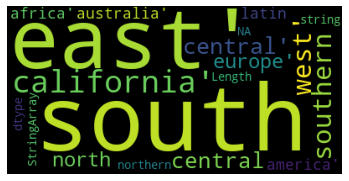

In [56]:
visualize_word('region')

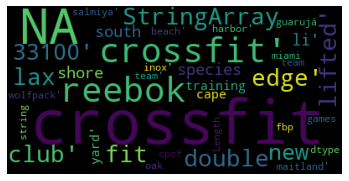

In [57]:
visualize_word('team')

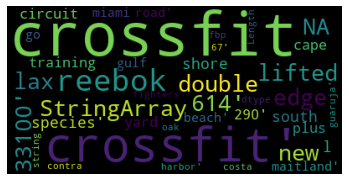

In [58]:
visualize_word('affiliate')

<a id="1"></a> <br>
## Histogram
* How many times each value appears in dfset. This description is called the distribution of variable
* Most common way to represent distribution of varible is histogram that is graph which shows frequency of each value.
* Frequency = number of times each value appears

TypeError: boolean value of NA is ambiguous

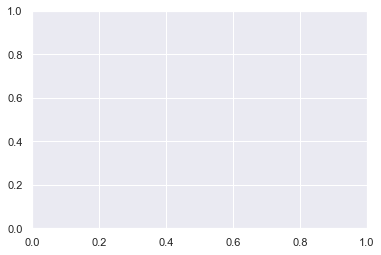

In [60]:
female = plt.hist(df[df["gender"] == "female"].weight,bins=30,fc = (1,0,0,0.5),label = "female")
male = plt.hist(df[df["gender"] == "male"].weight,bins=30,fc = (0,1,0,0.5),label = "male")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for male and female Tumors")
plt.show()
frequent_malignant_radius_mean = female[0].max()
index_frequent_malignant_radius_mean = list(female[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = female[1][index_frequent_malignant_radius_mean]
print("Most frequent female radius mean is: ",most_frequent_malignant_radius_mean)

female

male

In [61]:
df_bening = df[df["gender"] == "male"]
df_malignant = df[df["gender"] == "female"]
desc = df_bening.weight.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
df_bening[df_bening.weight < lower_bound].weight
print("Outliers: ",df_bening[(df_bening.weight < lower_bound) | (df_bening.weight > upper_bound)].weight.values)

Anything outside this range is an outlier: ( 123.5 , 247.5 )
Outliers:  <IntegerArray>
[ 82, 249, 315,  89,  83, 255, 306,  67,  79, 106,
 ...
 325, 262,  97, 253, 118,  80, 250, 280, 330, 251]
Length: 4095, dtype: Int64


male

In [62]:
melted_df = pd.melt(df,id_vars = "gender",value_vars = ['weight', 'texture_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="gender",df= melted_df)
plt.show()

KeyError: "The following 'value_vars' are not present in the DataFrame: ['texture_mean']"

male

In [63]:
print("mean: ",df_bening.weight.mean())
print("variance: ",df_bening.weight.var())
print("standart deviation (std): ",df_bening.weight.std())
print("describe method: ",df_bening.weight.describe())

mean:  187.2872173550271
variance:  1551.7441957545568
standart deviation (std):  39.39218445014895
describe method:  count    119850.000000
mean        187.287217
std          39.392184
min           1.000000
25%         170.000000
50%         185.000000
75%         201.000000
max        9008.000000
Name: weight, dtype: float64


male

TypeError: boolean value of NA is ambiguous

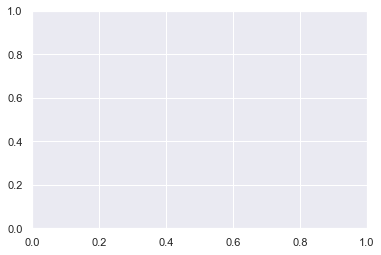

In [64]:
plt.hist(df_bening.weight,bins=50,fc=(0,1,0,0.5),label='male',normed = True,cumulative = True)
sorted_df = np.sort(df_bening.weight)
y = np.arange(len(sorted_df))/float(len(sorted_df)-1)
plt.plot(sorted_df,y,color='red')
plt.title('CDF of male tumor radius mean')
plt.show()

female

In [65]:
mean_diff = df_malignant.weight.mean() - df_bening.weight.mean()
var_bening = df_bening.weight.var()
var_malignant = df_malignant.weight.var()
var_pooled = (len(df_bening)*var_bening +len(df_malignant)*var_malignant ) / float(len(df_bening)+ len(df_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  -1.36695614128341


<a id="7"></a> <br>
## Relationship Between Variables

<a id="8"></a> <br>
## Correlation
* Strength of the relationship between two variables
* Lets look at correlation between all features.

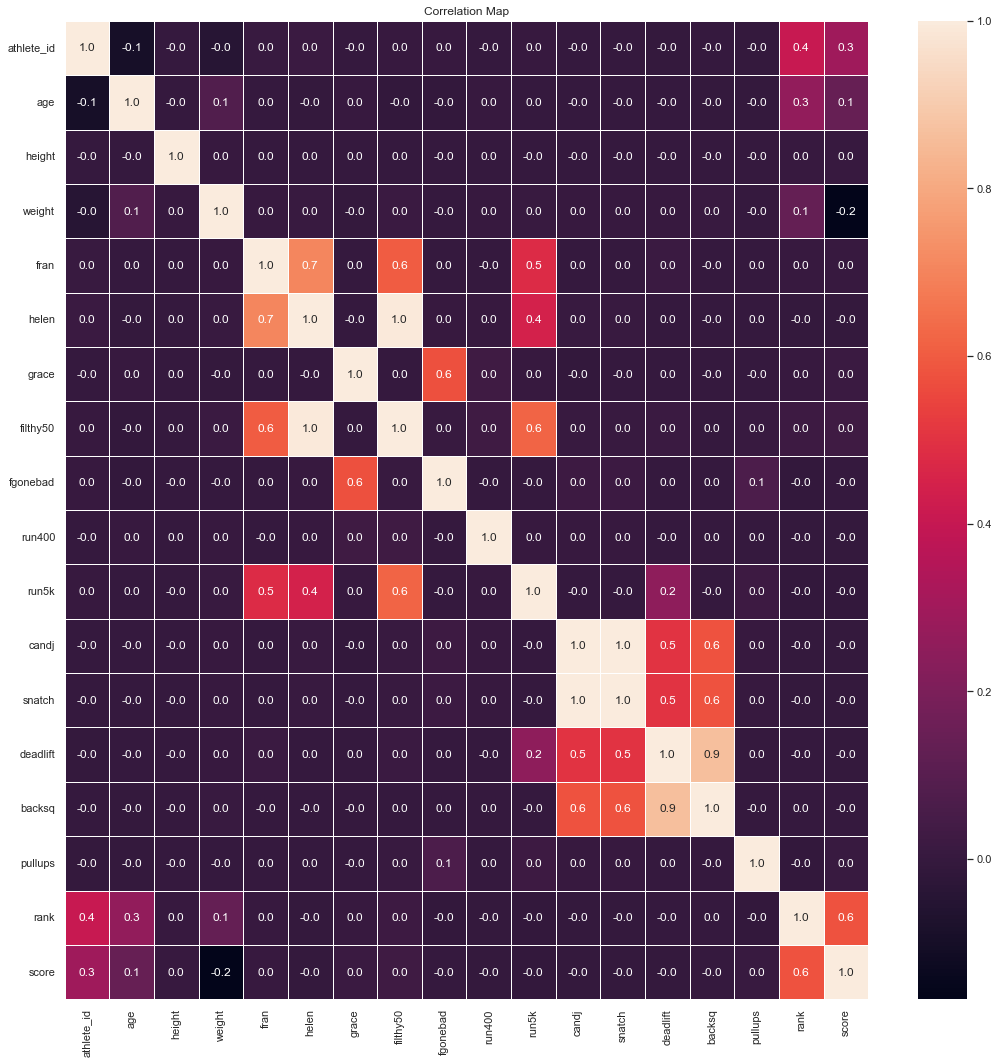

In [68]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

* Huge matrix that includes a lot of numbers
* The range of this numbers are -1 to 1.
* Meaning of 1 is two variable are positively correlated with each other like radius mean and area mean
* Meaning of zero is there is no correlation between variables like radius mean and fractal dimension se
* Meaning of -1 is two variables are negatively correlated with each other like radius mean and fractal dimension mean.Actually correlation between of them is not -1, it is -0.3 but the idea is that if sign of correlation is negative that means that there is negative correlation.

<a id="9"></a> <br>
## Covariance
* Covariance is measure of the tendency of two variables to vary together
* So covariance is maximized if two vectors are identical
* Covariance is zero if they are orthogonal.
* Covariance is negative if they point in opposite direction
* Lets look at covariance between radius mean and area mean. Then look at radius mean and fractal dimension se


In [ ]:
np.cov(df.weight,df.height)
print("Covariance between radius mean and area mean: ",df.weight.cov(df.height))
print("Covariance between radius mean and fractal dimension se: ",df.weight.cov(df.fractal_dimension_se))

weight

In [ ]:
p1 = df.loc[:,["height","weight"]].corr(method= "pearson")
p2 = df.weight.cov(df.height)/(df.weight.std()*df.height.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

<a id="11"></a> <br>
## Spearman's Rank Correlation
* Pearson correlation works well if the relationship between variables are linear and variables are roughly normal. But it is not robust, if there are outliers
* To compute spearman's correlation we need to compute rank of each value


In [76]:
ranked_df = df.rank()
spearman_corr = ranked_df.loc[:,["height","weight"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)

Spearman's correlation: 
          height    weight
height  1.000000  0.736663
weight  0.736663  1.000000


* Spearman's correlation is little higher than pearson correlation
    * If relationship between distributions are non linear, spearman's correlation tends to better estimate the strength of relationship
    * Pearson correlation can be affected by outliers. Spearman's correlation is more robust.

<a id="13"></a> <br>
## Hypothesis Testing
* Classical Hypothesis Testing

In [74]:
from scipy.stats import stats

statistic, p_value = stats.ttest_rel(df.weight,df.height)
print('p-value: ',p_value)

TypeError: boolean value of NA is ambiguous

* P values is almost zero so we can reject null hypothesis.

<a id="14"></a> <br>
## Normal(Gaussian) Distribution and z-score
* Also called bell shaped distribution
* Instead of making formal definition of gaussian distribution, I want to explain it with an example.


mean:  109.93369258652558
standart deviation:  19.995855368663563


AttributeError: 'Rectangle' object has no property 'normed'

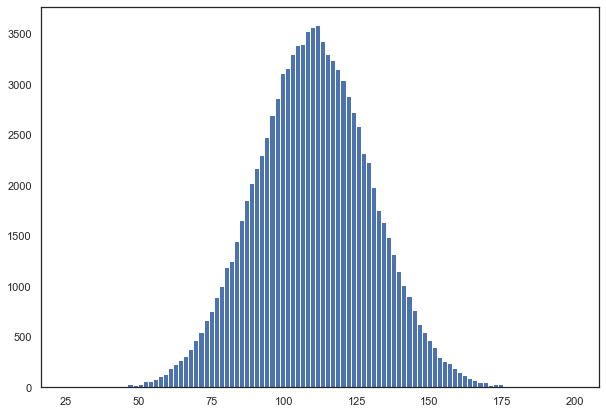

In [72]:
# parameters of normal distribution
mu, sigma = 110, 20  # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
print("mean: ", np.mean(s))
print("standart deviation: ", np.std(s))
# visualize with histogram
plt.figure(figsize = (10,7))
plt.hist(s, 100, normed=False)
plt.ylabel("frequency")
plt.xlabel("IQ")
plt.title("Histogram of IQ")
plt.show()